In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import mean,std

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 1. Preliminary Analysis

### 1.a Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

In [2]:
df = pd.read_excel('1645792390_cep1_dataset.xlsx')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

##### Observation:
   1. CardioVascular data has 303 rows and 14 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##### Observation:
   1. Cardiovascular data has 13 columns as int64 datatype and 1 column as float64 datatype.

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##### Observation:
   1. There are no null values present in any of the columns.

In [6]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


##### Observation:
   1. There is one duplicate record present in this dataset.

### 1.b Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

In [7]:
df.drop(164, axis = 0, inplace = True)

##### Observation:
   1. Dropping the one duplicate record found.

In [8]:
df.shape

(302, 14)

##### Observation:
   1. Checking for the shape of the dataframe. Row/Record count has been decreased from 303 to 302 after dropping one record.

## 2. Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

### 2.a Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


##### Observation:
   1. Displays the statistical summary of the data.
   2. It also displays the central tendencied and spread of the data.

### 2.b Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

In [10]:
for i in df.columns:
    if (df[i].nunique() < 20):
        print(i,'-->',df[i].unique())

sex --> [1 0]
cp --> [3 2 1 0]
fbs --> [1 0]
restecg --> [0 1 2]
exang --> [0 1]
slope --> [0 2 1]
ca --> [0 2 1 3 4]
thal --> [1 2 3 0]
target --> [1 0]


##### Observation:
   1. Displays all the categorical columns which has categories less than 20.

#### Count plots for categorical variable

Text(0.5, 1.0, 'Count plot for Sex category \n')

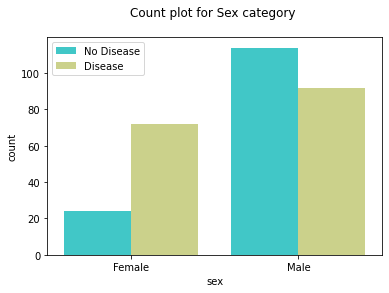

In [11]:
#Count plot for sex

sns.countplot(x='sex',hue='target', data=df, palette='rainbow')
plt.legend(["No Disease","Disease"])
plt.xticks([0,1],["Female","Male"])
plt.title('Count plot for Sex category \n')

##### Observation:
   1. From the above count plot, we can infer that more or less equal percentage of both females and males are mostly affected with CVD.
   2. Count is high for males with no CVD.

Text(0.5, 1.0, 'Count plot for Chest pain type \n')

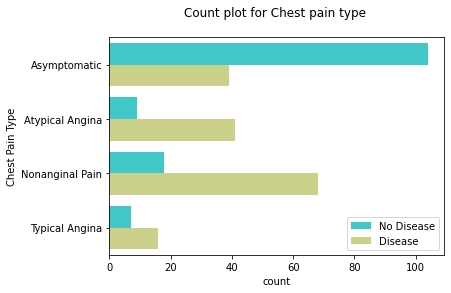

In [12]:
#Count plot for Chest pain type

sns.countplot(y='cp', data=df, hue='target', palette='rainbow')
plt.legend(["No Disease","Disease"])
plt.yticks([0,1,2,3],['Asymptomatic','Atypical Angina','Nonanginal Pain','Typical Angina'])
plt.ylabel('Chest Pain Type')
plt.title('Count plot for Chest pain type \n')

##### Observation:
   1. From the above count plot, we can infer that people with nonanginal pain are affected with cardio vascular disease.
   2. This also conveys that inspite of any chest pain type, a person gets affected with CVD.

Text(0.5, 1.0, 'Count plot for Fasting blood sugar\n')

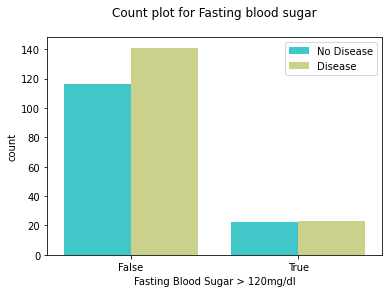

In [13]:
#Count plot for Fasting blood sugar

sns.countplot(x='fbs', data=df, hue='target', palette='rainbow')
plt.legend(["No Disease","Disease"])
plt.xticks([0,1],['False','True'])
plt.xlabel('Fasting Blood Sugar > 120mg/dl')
plt.title('Count plot for Fasting blood sugar\n')

##### Observation:
   1. Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
   2. From the above count plot, we can infer that people with fasting blood sugar < 120mg/dl have mostly been affected with CVD.
   3. This shows that there is no relationship between fasting blood sugar and CVD as people with fbs>120 are less affected with CVD.

Text(0.5, 1.0, 'Count plot for Resting Electrocardiograph Results\n')

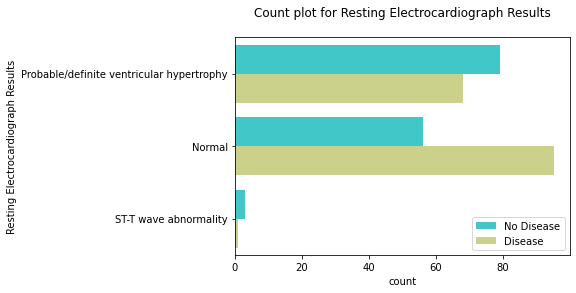

In [14]:
#Count plot for Resting electrocardiographic results

sns.countplot(y='restecg', data=df, hue='target', palette='rainbow')
plt.legend(["No Disease","Disease"])
plt.yticks([0,1,2],['Probable/definite ventricular hypertrophy','Normal','ST-T wave abnormality'])
plt.ylabel('Resting Electrocardiograph Results')
plt.title('Count plot for Resting Electrocardiograph Results\n')

##### Observation:
   1. From the above count plot, we can infer that people with normal resting electrocardiograph and probable/definite ventricular hypertrophy have mostly been affected with CVD.

Text(0.5, 1.0, 'Count plot for Exercise induced angina\n')

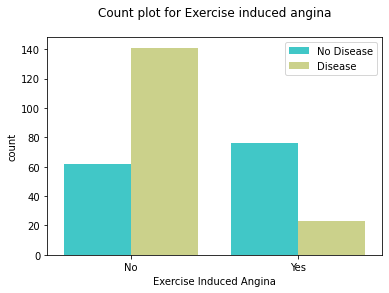

In [15]:
#Count plot for Exercise induced angina

sns.countplot(x='exang', data=df, hue='target', palette='rainbow')
plt.legend(["No Disease","Disease"])
plt.xticks([0,1],['No','Yes'])
plt.xlabel('Exercise Induced Angina')
plt.title('Count plot for Exercise induced angina\n')

##### Observation:
   1. From the above count plot, we can infer that people who does not have exercise induced angina have mostly been affected with CVD.

Text(0.5, 1.0, 'Count plot for Slope of the peak exercise ST segment\n')

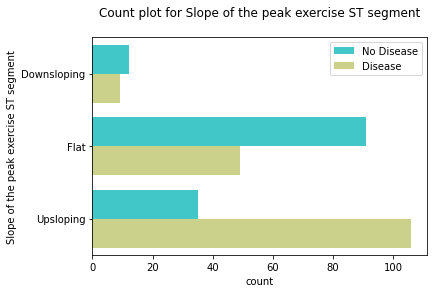

In [16]:
#Count plot for Slope of the peak exercise ST segment

sns.countplot(y='slope', data=df, hue='target', palette='rainbow')
plt.legend(["No Disease","Disease"])
plt.yticks([0,1,2],['Downsloping','Flat','Upsloping'])
plt.ylabel('Slope of the peak exercise ST segment')
plt.title('Count plot for Slope of the peak exercise ST segment\n')

##### Observation:
   1. From the above count plot, we can infer that irrespective of the slope type people are affected with CVD.
   2. This shows that there is a strong relationship between slope and target.
   3. Mostly people with upsloping slope have been affected with CVD.

Text(0.5, 1.0, 'Count plot for Number of major vessels (0-3) colored by fluoroscopy\n')

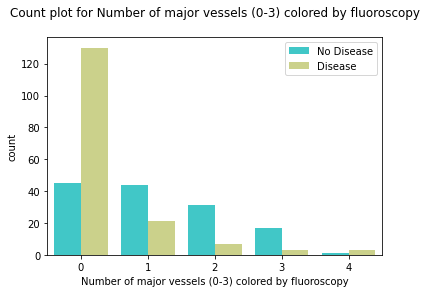

In [17]:
#Count plot for Number of major vessels (0-3) colored by fluoroscopy

sns.countplot(x='ca', data=df, hue='target', palette='rainbow')
plt.legend(['No Disease','Disease'])
plt.xlabel('Number of major vessels (0-3) colored by fluoroscopy')
plt.title('Count plot for Number of major vessels (0-3) colored by fluoroscopy\n')

In [18]:
df.loc[df.thal == 3]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


##### Observation:
   1. From the above count plot, we can infer that people having no.of major vessels 0 are mostly affected with CVD.

Text(0.5, 1.0, 'Count plot for Thallium\n')

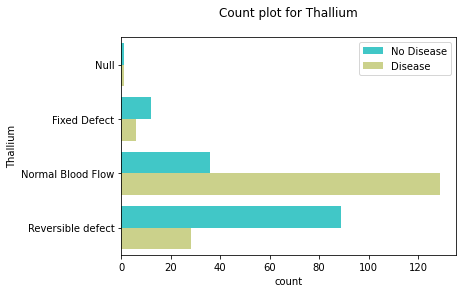

In [19]:
#Count plot for Thallium

sns.countplot(y='thal', data=df, hue='target', palette='rainbow')
plt.legend(['No Disease','Disease'])
plt.yticks([0,1,2,3],['Null','Fixed Defect','Normal Blood Flow','Reversible defect'])
plt.ylabel('Thallium')
plt.title('Count plot for Thallium\n')

##### Observation:
   1. From the above count plot, we can infer that even people having normal blood flow are affected with CVD.

Text(0.5, 1.0, 'Count plot for Target')

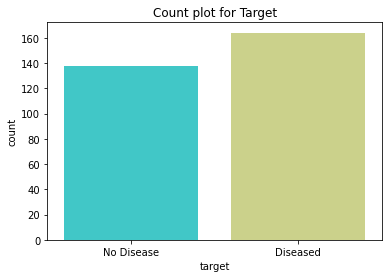

In [20]:
#Count plot for Target

sns.countplot(x='target', data=df, palette='rainbow')
plt.xticks([0,1],['No Disease', 'Diseased'])
plt.title('Count plot for Target')

##### Observation:
   1. From the above count plot, we can infer that count of people affected with CVD are slightly higher than the count of people not affected with CVD.

In [21]:
vc = df.target.value_counts()
vc

1    164
0    138
Name: target, dtype: int64

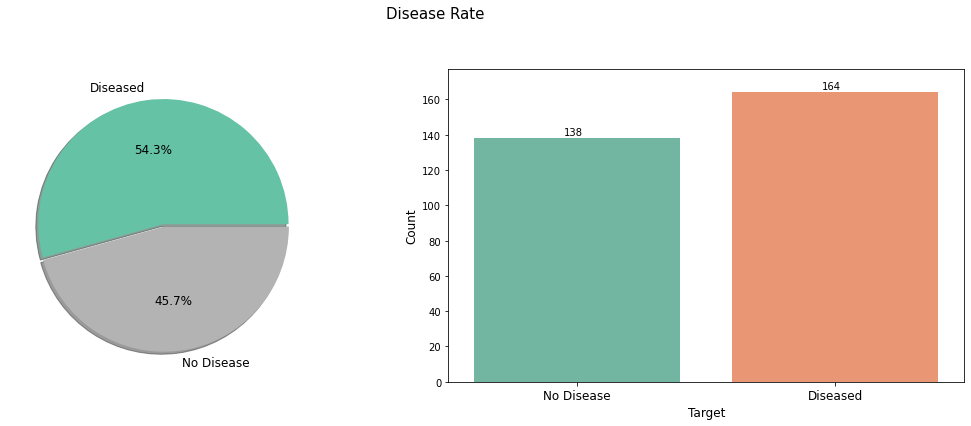

In [22]:
#Checking the Bias
f,axes = plt.subplots(1,2, figsize = (15,6))

# plot no. 1
vc.plot.pie(ax = axes[0], radius = 1, cmap = 'Set2' , explode = [0.01,0.01], shadow = True, autopct = '%1.1f%%',
           textprops = {'family': 'DejaVu Sans','color': 'black','size': 12}, labels = ['Diseased','No Disease'])
axes[0].set_ylabel('')

# plot no. 2
sns.countplot(df.target,ax = axes[1],palette= 'Set2')
for i in range(len(vc)):
    axes[1].annotate(vc[i], (i-0.05,vc[i]+2), fontsize = 10)
axes[1].set_ylim(0,axes[1].set_ylim()[1]+5)
axes[1].set_xlabel('Target',fontsize = 12, family = 'DejaVu Sans')
axes[1].set_ylabel('Count',fontsize = 12, family = 'DejaVu Sans')
axes[1].set_xticklabels( ['No Disease','Diseased'], fontsize = 12, family = 'DejaVu Sans')
f.suptitle('Disease Rate\n\n', fontsize = 15, family = 'DejaVu Sans')
plt.tight_layout()
plt.show()

##### Observation:
   The above pie plot shows that it is a fairly balanced dataset.

### 2.c Study the occurrence of CVD across the Age category

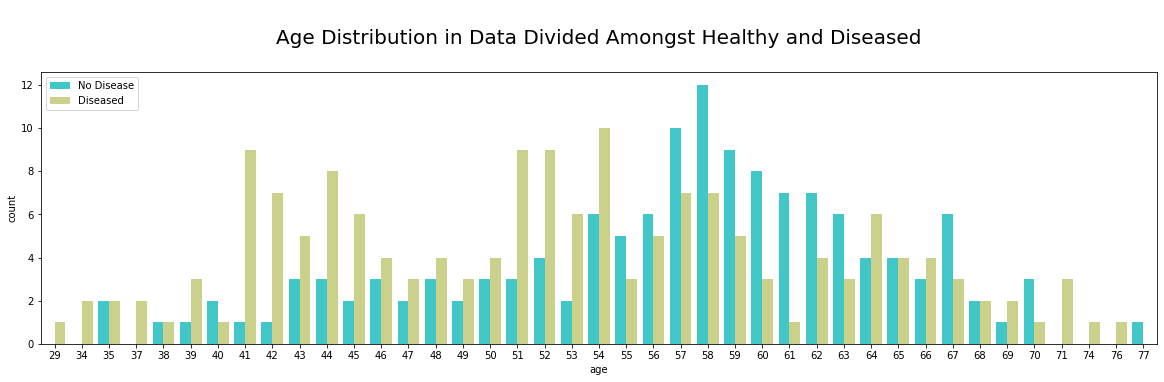

In [23]:
#1. Occurrence of CVD across Age
plt.figure(figsize = (20,5))
sns.countplot(df.age, hue = df.target, palette='rainbow')
plt.legend(['No Disease','Diseased'], loc = 'upper left')
plt.title('\nAge Distribution in Data Divided Amongst Healthy and Diseased\n', fontsize = 20)
plt.show()

##### Observation:
   1. From the above count plot, we can infer that people with age between 41 to 44 and 51 to 54 are mostly affected with CVD.
   2. We also infer that people with young age 29 and 34 are affected with CVD.

In [24]:
dsprsnt = df[df.target == 1].copy()
dsabsnt = df[df.target == 0].copy()

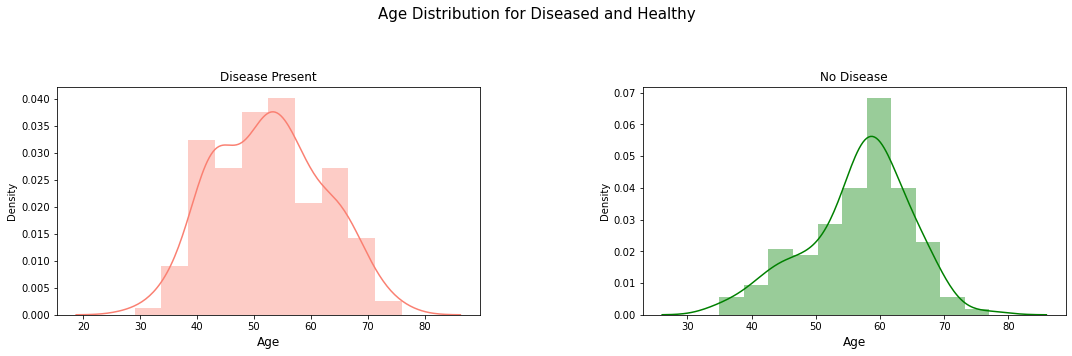

In [25]:
#2. Age Distribution for Diseased and Healthy
f,axes = plt.subplots(1,2, figsize = (15,5))
sns.distplot(dsprsnt.age,ax = axes[0], color = 'salmon')
sns.distplot(dsabsnt.age, ax = axes[1], color = 'green')
axes[0].set_title('Disease Present',fontdict = {'family': 'DejaVu Sans','size': 12})
axes[1].set_title('No Disease',fontdict = {'family': 'DejaVu Sans','size': 12})
axes[0].set_xlabel('Age', fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 12})
axes[1].set_xlabel('Age',fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 12})
f.suptitle('Age Distribution for Diseased and Healthy\n\n ',fontsize= 15)
plt.tight_layout(w_pad= 12)
plt.show()

### 2.d Study the composition of all patients with respect to the Sex category

In [26]:
df.groupby('sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.125000,0.572917,151.12500,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.834951,0.927184,130.912621,239.601942,0.160194,0.504854,148.84466,0.373786,1.120874,1.383495,0.796117,2.402913,0.446602


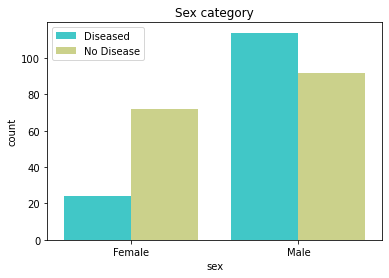

In [27]:
#Bar plot for sex
plt.title('Sex category')
sns.countplot(x='sex',hue='target', data=df, palette='rainbow')
plt.xticks([0,1],['Female','Male'])
plt.legend(['Diseased','No Disease'])

##### Observation:
   1. From the above bar plot, we can infer that proportion of female is higher than males.

In [28]:
vc = df['sex'].value_counts() 
vc

1    206
0     96
Name: sex, dtype: int64

Text(0.5, 1.0, 'Overall Sex Distribution\n')

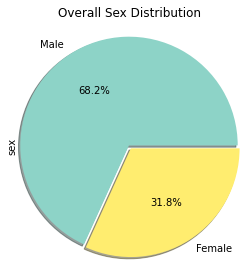

In [29]:
nouniq = df['sex'].nunique()
# overall pie
vc.plot.pie(radius = 1.25,cmap = 'Set3', autopct = '%0.1f%%',
                                        textprops = {'family': 'DejaVu Sans','color': 'black','size': 10},labels = ['Male','Female'],
                                        explode = [0.02]*nouniq,shadow = True,)

plt.title('Overall {} Distribution\n'.format('sex'.capitalize()),family='DejaVu Sans',fontsize= 12)

### 2.e Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

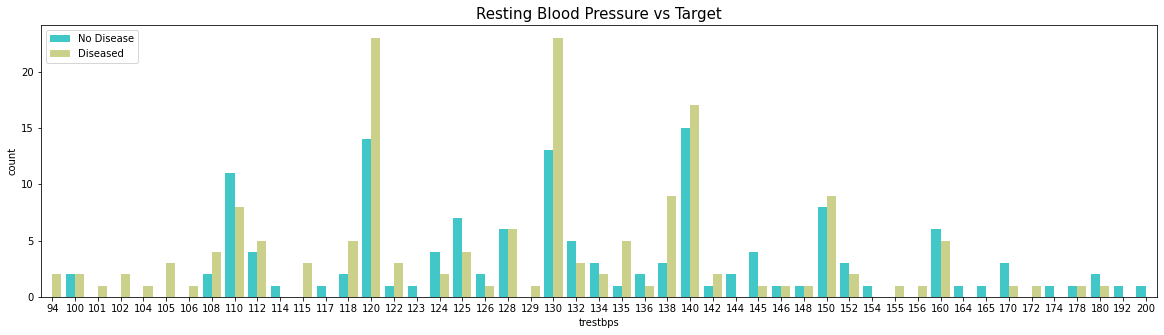

In [30]:
plt.figure(figsize = (20,5))
sns.countplot(df.trestbps, hue = df.target, palette='rainbow')
plt.legend(['No Disease','Diseased'], loc = 'upper left')
plt.title('Resting Blood Pressure vs Target', fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Resting Blood Pressure vs CVD\n\n ')

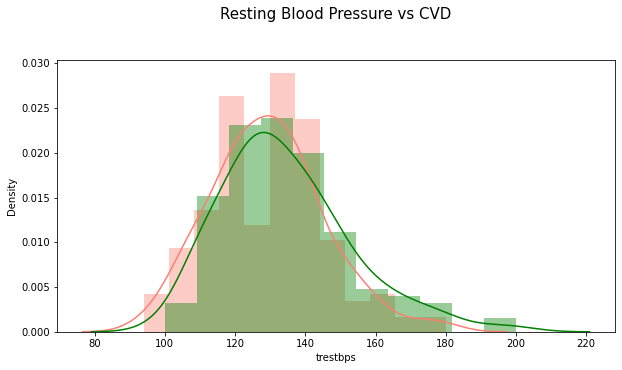

In [31]:
plt.figure(figsize=(10,5))
sns.distplot(dsprsnt['trestbps'],color = 'salmon')
sns.distplot(dsabsnt['trestbps'], color = 'green')
plt.title('Resting Blood Pressure vs CVD\n\n ',fontsize= 15, family = 'DejaVu Sans')

##### Observation:
   1. The above plot shows that people with normal blood pressure (between 120-130) are highly affected with CVD.
   2. People with high blood pressure (more than 140) are less affected with CVD.
   2. So, we can conclude that anamolies in the resting blood pressure cannot detect heart attacks.

### 2.f Describe the relationship between cholesterol levels and a target variable

<AxesSubplot:xlabel='chol', ylabel='target'>

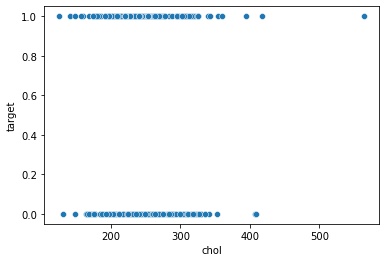

In [32]:
sns.scatterplot(x='chol',y='target',data=df)

Text(0.5, 1.0, 'Cholestrol vs CVD \n\n ')

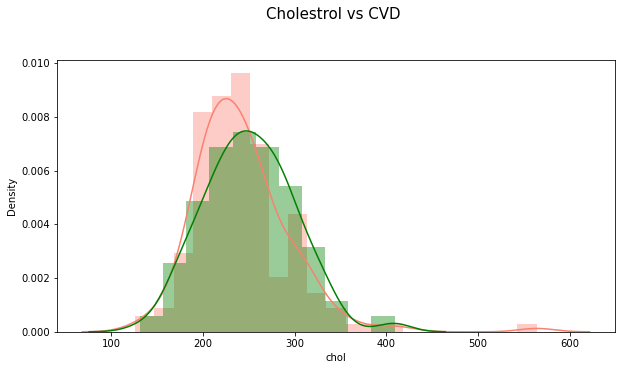

In [33]:
plt.figure(figsize=(10,5))
sns.distplot(dsprsnt['chol'],color = 'salmon')
sns.distplot(dsabsnt['chol'], color = 'green')
plt.title('Cholestrol vs CVD \n\n '.format('trestbps'.capitalize()),fontsize= 15, family = 'DejaVu Sans')

##### Observation:
   1. The above plot shows that even people with high cholestrol value are not affected with CVD.
   2. So, we conclude that there is no relationship between cholestrol levels and CVD.

### 2.g State what relationship exists between peak exercising and the occurrence of a heart attack

<AxesSubplot:xlabel='oldpeak', ylabel='target'>

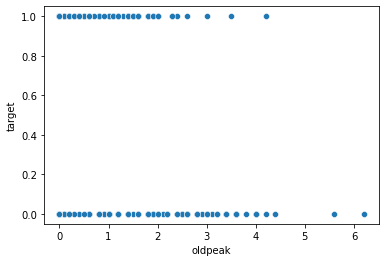

In [34]:
sns.scatterplot(x='oldpeak',y='target',data=df)

Text(0.5, 1.0, 'ST depression induced by exercise vs CVD \n\n ')

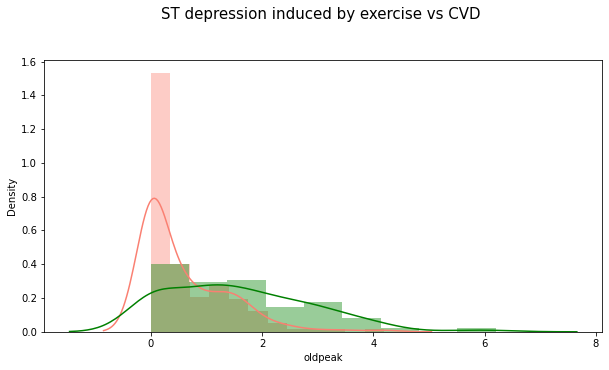

In [35]:
plt.figure(figsize=(10,5))
sns.distplot(dsprsnt['oldpeak'],color = 'salmon')
sns.distplot(dsabsnt['oldpeak'], color = 'green')
plt.title('ST depression induced by exercise vs CVD \n\n '.format('trestbps'.capitalize()),fontsize= 15, family = 'DejaVu Sans')

##### Observation:
   1. The above scatter plot shows that people even with high ST depression induced by exercise are not affected with CVD.
   2. So, we conclude that even with peak exercising rate there is no occurence of heart attack.

Text(0.5, 0, 'Slope of the peak exercise ST segment')

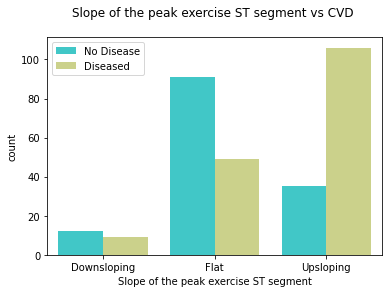

In [36]:
sns.countplot(x='slope',hue='target',data=df, palette='rainbow')
plt.xticks([0,1,2],['Downsloping','Flat','Upsloping'])
plt.legend(['No Disease', 'Diseased'])
plt.title('Slope of the peak exercise ST segment vs CVD \n')
plt.xlabel('Slope of the peak exercise ST segment')

Text(0.5, 1.0, 'Slope of the peak exercise ST segment vs CVD \n\n ')

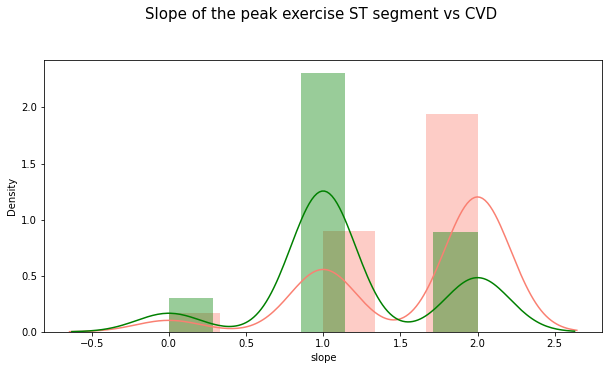

In [37]:
plt.figure(figsize=(10,5))
sns.distplot(dsprsnt['slope'],color = 'salmon')
sns.distplot(dsabsnt['slope'], color = 'green')
plt.title('Slope of the peak exercise ST segment vs CVD \n\n '.format('slope'.capitalize()),fontsize= 15, family = 'DejaVu Sans')

##### Observation:
   1. The above plot shows that inspite of any type of slope people are affected with CVD.
   2. We can also observe that people with slope type 2 are highly affected with CVD.
   3. So, we conclude that there is a relationship between slope and CVD.

### 2.h Check if thalassemia is a major cause of CVD

Text(0.5, 0, 'Thallium')

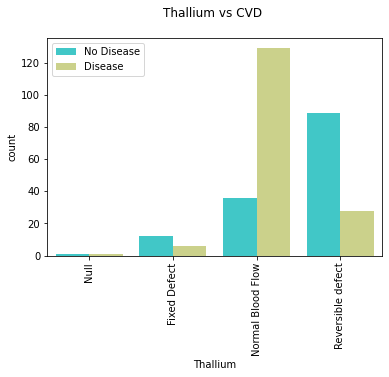

In [38]:
sns.countplot(x='thal',hue='target',data=df, palette='rainbow')
plt.legend(['No Disease', 'Disease'])
plt.xticks([0,1,2,3],['Null','Fixed Defect','Normal Blood Flow','Reversible defect'], rotation=90)
plt.title('Thallium vs CVD \n')
plt.xlabel('Thallium')

Text(0.5, 1.0, 'Thallium vs CVD \n\n ')

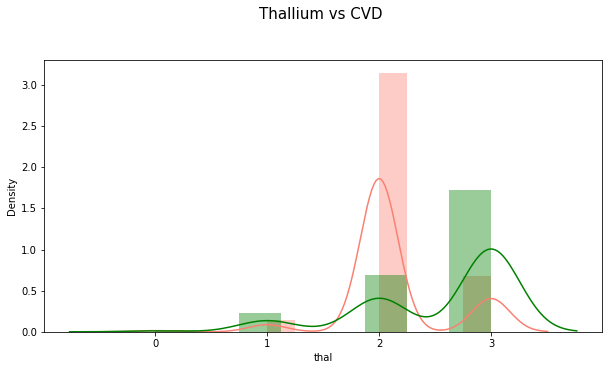

In [39]:
plt.figure(figsize=(10,5))
sns.distplot(dsprsnt['thal'],color = 'salmon')
sns.distplot(dsabsnt['thal'], color = 'green')
plt.title('Thallium vs CVD \n\n '.format('thal'.capitalize()),fontsize= 15, family = 'DejaVu Sans')

##### Observation:
   1. The above plot shows that inspite of any type of thallium people are affected with CVD.
   2. So, we conclude that thallium is a major cause of CVD.

### 2.i List how the other factors determine the occurrence of CVD

In [40]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

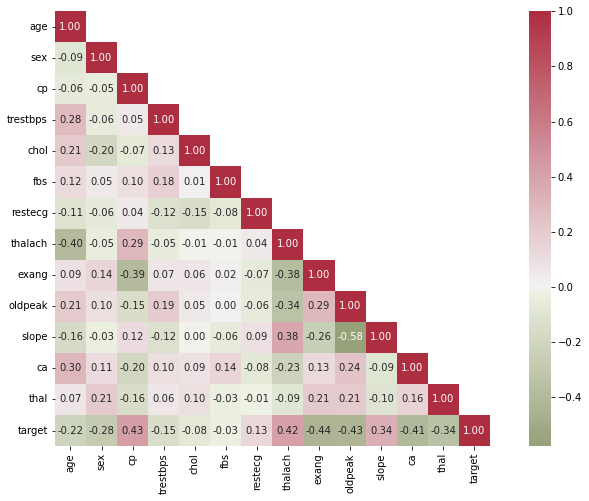

In [41]:
corr = df.corr()
mask = np.triu(np.ones_like(corr))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)
np.fill_diagonal(mask, False)

plt.figure(figsize=(14, 8))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

##### Observation:
   1. The heatmap shows the how strongly the features and target are correlated with each other.
   2. 1 - Strong +ve correlation
      0 - No correlation
      -1 - Strong Negative correlation
   3. Peason correlation method shows the features correlated with target with a threshold value >=0.3 and <=-0.3

### 2.j Use a pair plot to understand the relationship between all the given variables

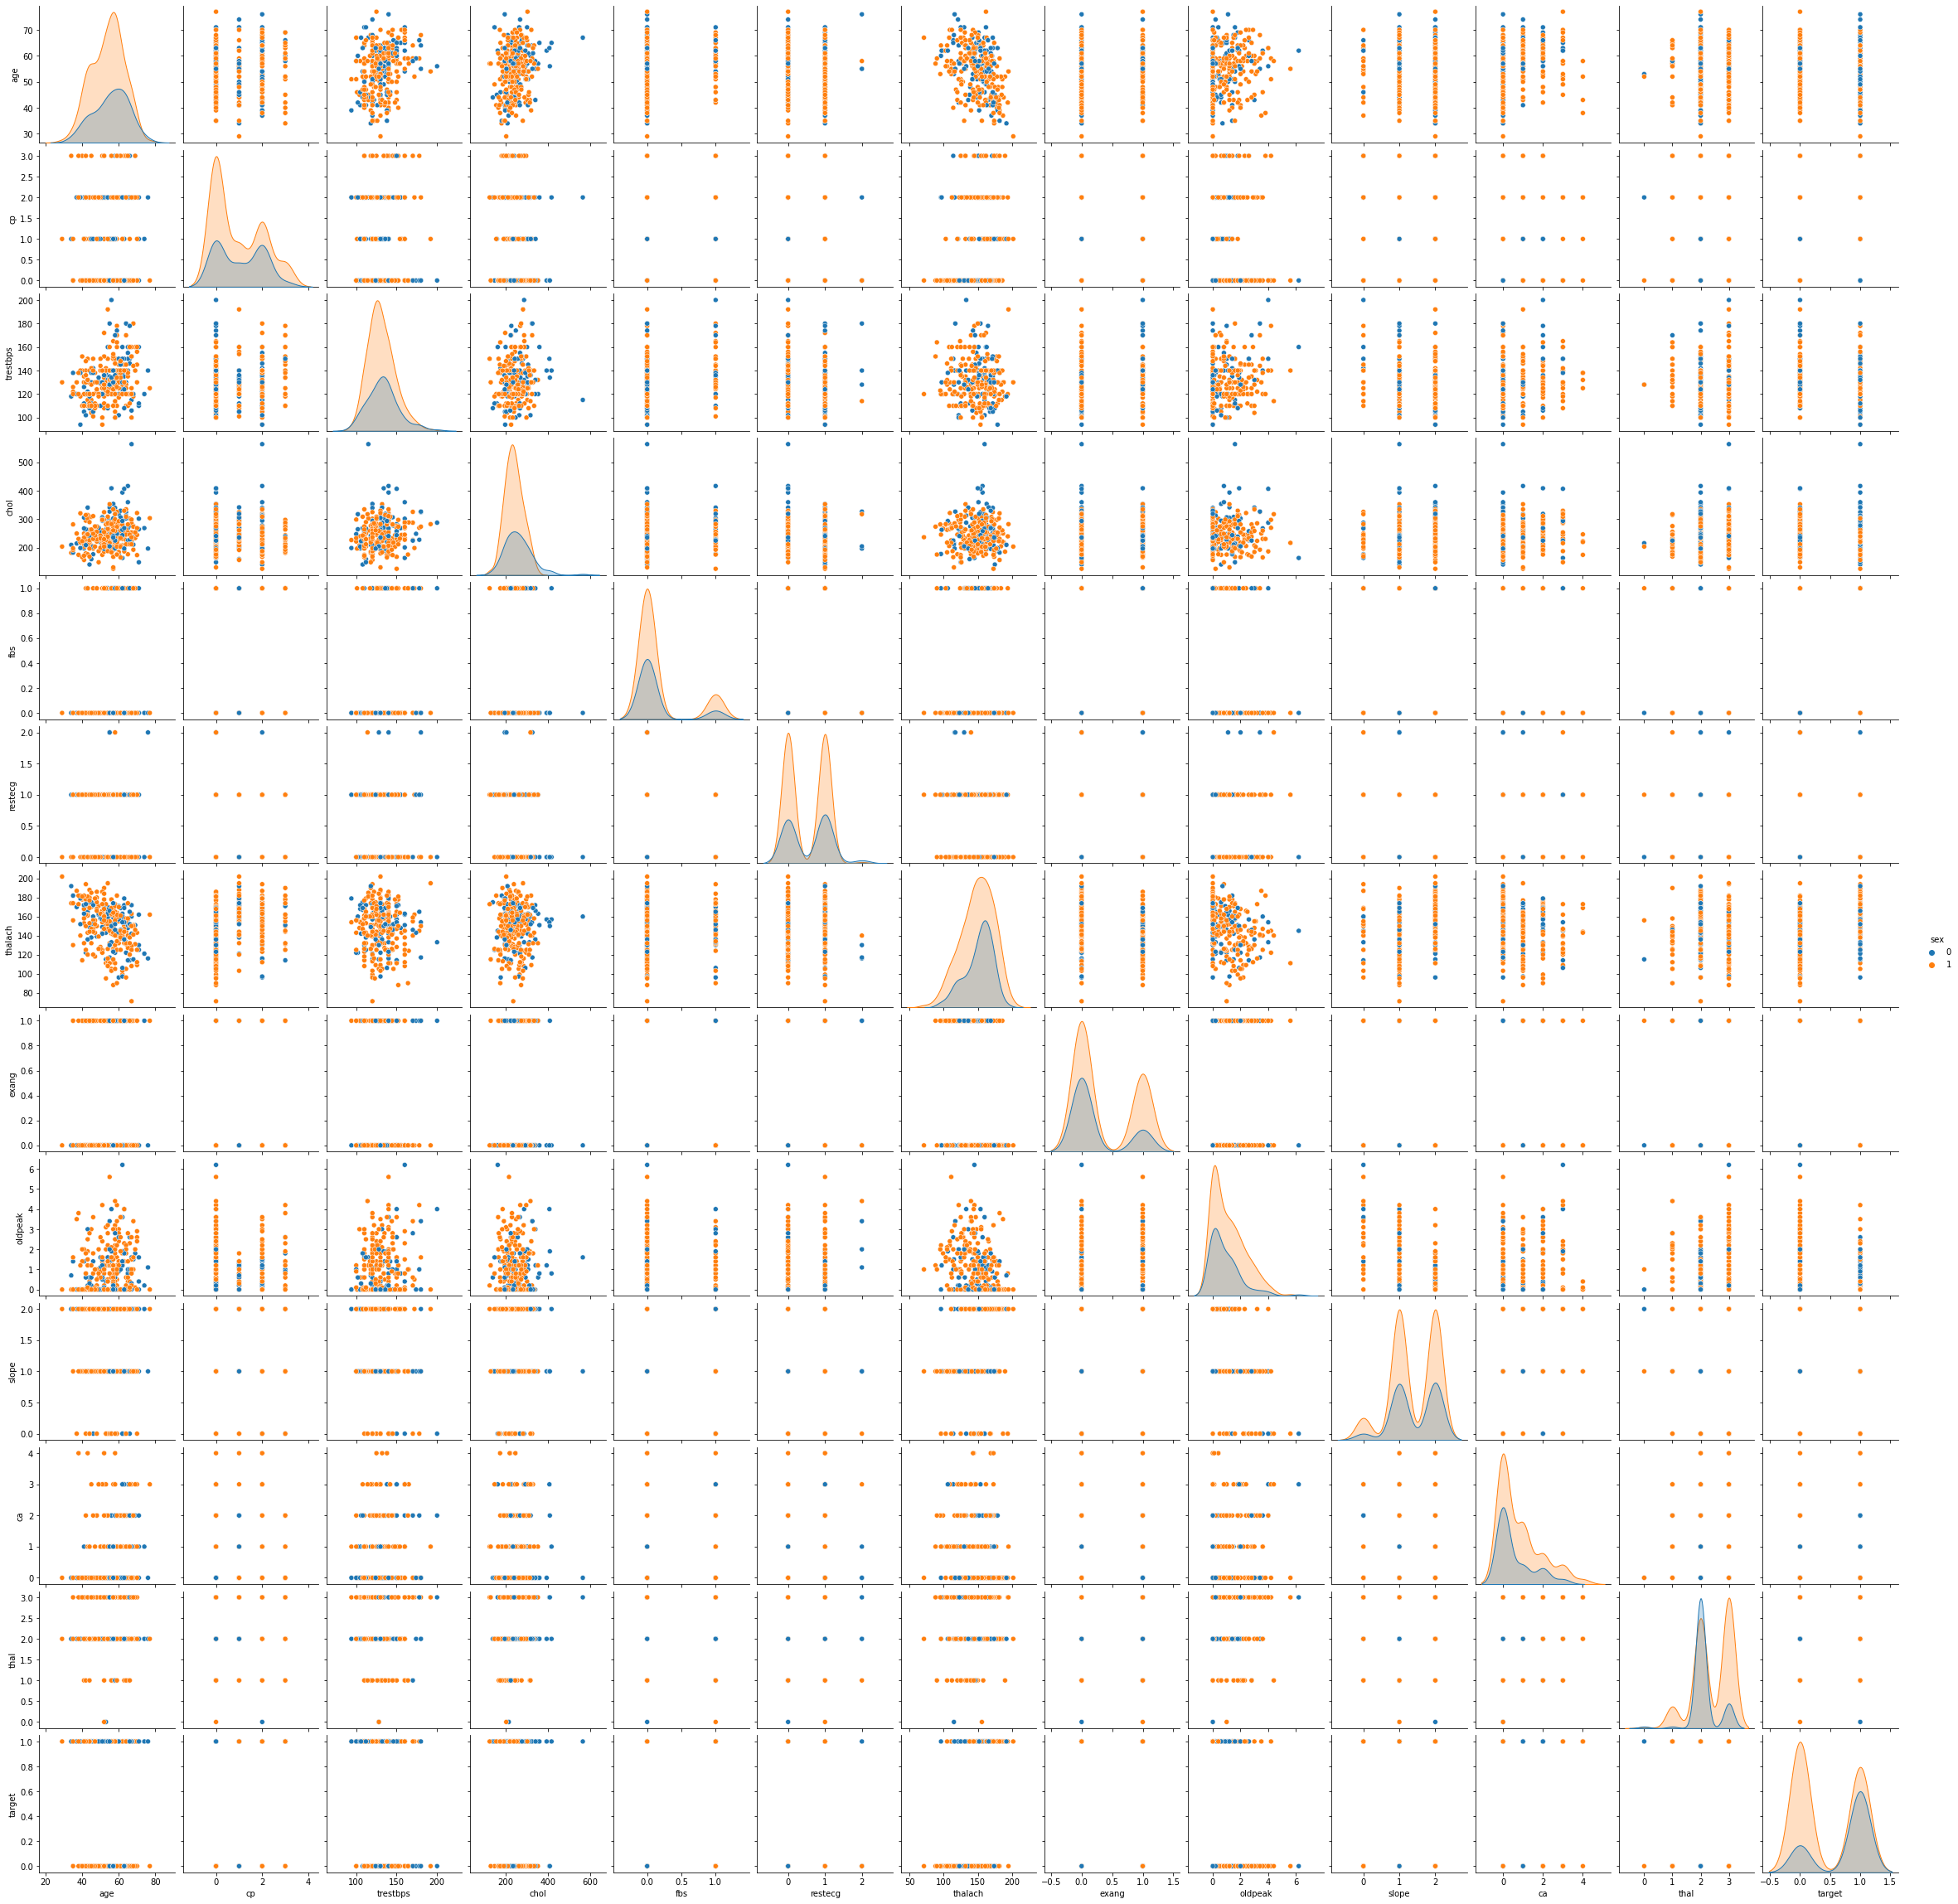

In [42]:
sns.pairplot(df, diag_kind = 'kde', hue='sex')

##### Observation:
   1. The pair plot shows the relationship between all variables.
   2. Pair plot also shows the distribution of each variable.
   2. We could also observe that distribution of oldpeak and ca are negatively skewed.

### Other EDA

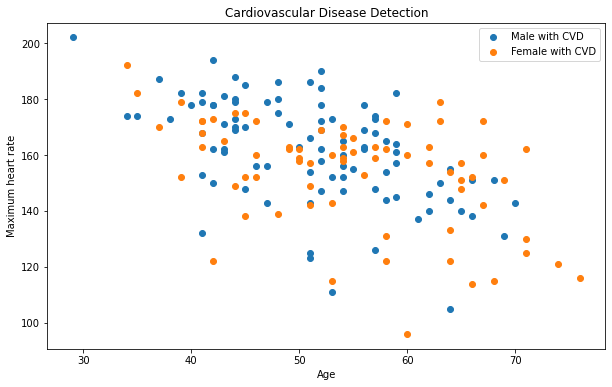

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(x=df[(df["target"] == 1) & (df['sex'] == 1)]['age'],y=df[(df["target"] == 1) & (df['sex'] == 1)]['thalach'])
plt.scatter(x=df[(df["target"] == 1) & (df['sex'] == 0)]['age'],y=df[(df["target"] == 1) & (df['sex'] == 0)]['thalach'])

plt.title("Cardiovascular Disease Detection")
plt.xlabel('Age')
plt.ylabel('Maximum heart rate')
plt.legend(['Male with CVD','Female with CVD'])

##### Observation:
   1. The above scatter plot shows that both males and females with CVD are between the age 50-60 with a maximum heart rate greater than 140.
   2. Predominantly males with CVD are having high heart rate >150.

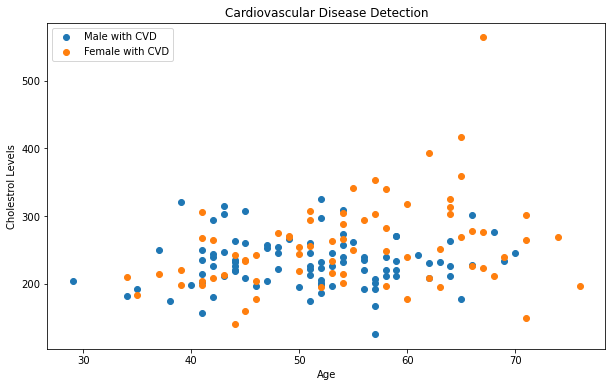

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(x=df[(df["target"] == 1) & (df['sex'] == 1)]['age'],y=df[(df["target"] == 1) & (df['sex'] == 1)]['chol'])
plt.scatter(x=df[(df["target"] == 1) & (df['sex'] == 0)]['age'],y=df[(df["target"] == 1) & (df['sex'] == 0)]['chol'])
plt.title("Cardiovascular Disease Detection")
plt.xlabel('Age')
plt.ylabel('Cholestrol Levels')
plt.legend(['Male with CVD','Female with CVD'])

##### Observation:
   1. The above scatter plot shows that both males and females with CVD are between the age 50-60 with a maximum heart rate greater than 140.
   2. Predominantly males with CVD are having high heart rate >150.

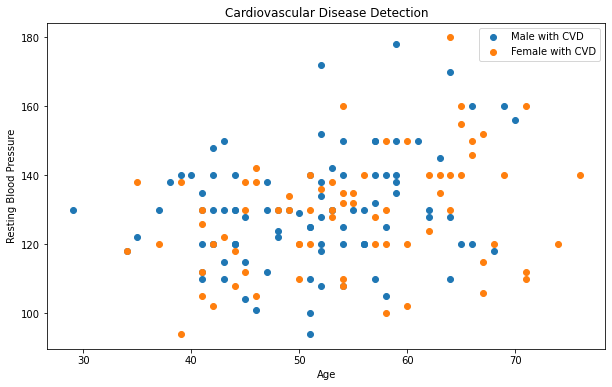

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(x=df[(df["target"] == 1) & (df['sex'] == 1)]['age'],y=df[(df["target"] == 1) & (df['sex'] == 1)]['trestbps'])
plt.scatter(x=df[(df["target"] == 1) & (df['sex'] == 0)]['age'],y=df[(df["target"] == 1) & (df['sex'] == 0)]['trestbps'])

plt.title("Cardiovascular Disease Detection")
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(['Male with CVD','Female with CVD'])

##### Observation:
   1. The above scatter plot shows that both males and females with CVD are having a normal resting blood pressure range.
   2. Only very few are having high resting BP.

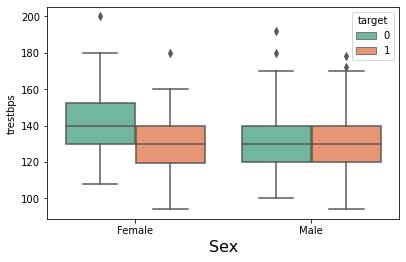

In [46]:
sns.boxplot(x = df.sex,  y = df.trestbps, hue = df.target, palette='Set2')
plt.xticks([0,1],['Female','Male'])
plt.xlabel('Sex',fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
plt.tight_layout(w_pad = 10, pad = 2)
plt.show()

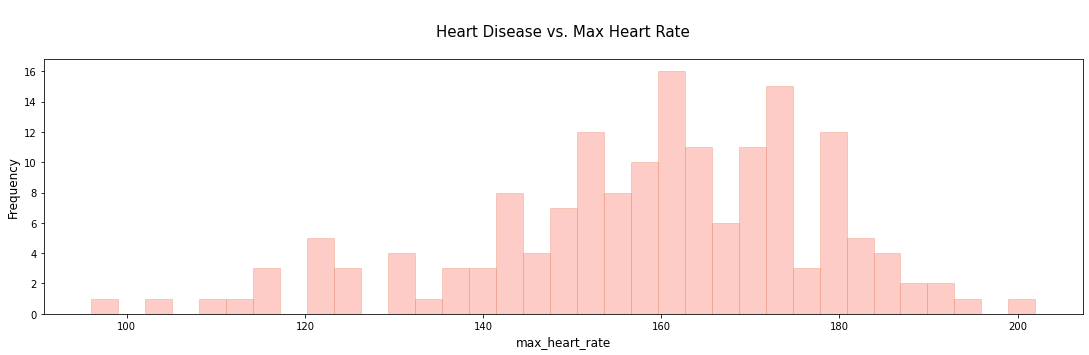

In [47]:
plt.figure(figsize = (15,5))
sns.distplot(dsprsnt.thalach, kde = False, bins = 35, hist_kws = {'edgecolor':'darksalmon', 'color' :'salmon'})
plt.title('\nHeart Disease vs. Max Heart Rate\n',family='DejaVu Sans',fontsize= 15)
plt.tight_layout( )
plt.xlabel('max_heart_rate',family='DejaVu Sans',fontsize= 12)
plt.ylabel('Frequency',family='DejaVu Sans',fontsize= 12)
plt.show()

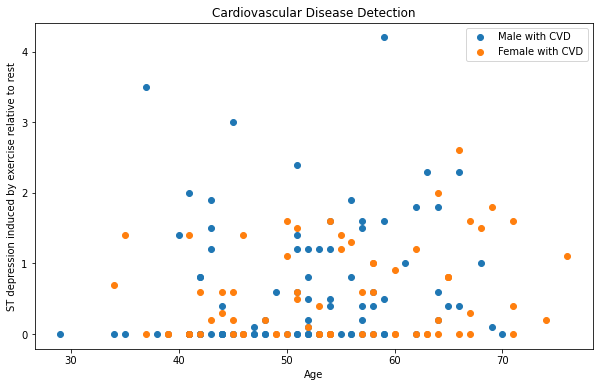

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(x=df[(df["target"] == 1) & (df['sex'] == 1)]['age'],y=df[(df["target"] == 1) & (df['sex'] == 1)]['oldpeak'])
plt.scatter(x=df[(df["target"] == 1) & (df['sex'] == 0)]['age'],y=df[(df["target"] == 1) & (df['sex'] == 0)]['oldpeak'])


plt.title("Cardiovascular Disease Detection")
plt.xlabel('Age')
plt.ylabel('ST depression induced by exercise relative to rest')
plt.legend(['Male with CVD','Female with CVD'])

##### Observation:
   1. The above scatter plot shows that both males and females with CVD are having ST depression as 0 irrespective of their age.
   2. Predominantly males are having high ST depression.

## 3. Model Building

### User-defined Functions

In [49]:
#Function to plot outliers using box plot

def plotOutliers(df):
    ix = 1
    fig = plt.figure(figsize = (15,10))
    for c in list(df.columns):
        if(df[c].nunique() > 5):
            if ix <= 5:
                ax2 = fig.add_subplot(2,5,ix+5)
                ax2.tick_params(axis='y', labelrotation=90)
                sns.boxplot(y=df[c], ax=ax2) #for boxplot     
                fig.tight_layout()
            ix = ix +1
            if ix == 6:
                fig = plt.figure(figsize = (15,10))
                ix = 1

In [50]:
#Function to call the Stats model for logistic regression models

def statsModel(ytrain,xtrain):
    result = sm.Logit(ytrain,xtrain).fit()
    return result

In [51]:
#Function to evalute VIF for identifying multicollinearity problems

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculateVIF(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)

In [52]:
#Function to build the model

def buildModel(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train) 
    
    test_pred = model.predict(x_test)
    train_pred = model.predict(x_train)
    
    train_accuracy_score=accuracy_score(y_train,train_pred)
    test_accuracy_score=accuracy_score(y_test,test_pred)
    
    print('Confusion Matrix'.upper()) 
    print(confusion_matrix(y_test, test_pred))
    
    print()
    
    print('Classification Report'.upper())
    print(classification_report(y_test, test_pred))
    
    return train_accuracy_score,test_accuracy_score

In [53]:
#Function to evaluate cross-validation score

def cross_validation_score(model,x_train,y_train):
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    cvs = cross_val_score(model, x_train, y_train, scoring='accuracy', cv= kfold)
    print("Scores:", cvs)
    return cvs.mean()

In [54]:
#Function to plot Receiver Operating Characteristic

from sklearn.metrics import roc_auc_score, roc_curve
def plot_roc_auc(model, x_test):
    logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    print('Accuracy of ROC curve:'.upper(), round(logit_roc_auc*100),'%')
    print()
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.show()

### Preprocessing

In [55]:
#Copying original dataframe to another dataframe

df_duplicate = df.copy()
df_duplicate.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
#Getting dummies for all nominal categorical variables

df_duplicate = pd.get_dummies(data= df_duplicate, columns=['cp','restecg','slope','thal'], drop_first=True)
df_duplicate.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,1,0,0,1,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,0,0,0,1,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,1,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,0,1,0,0,1,0,1,0


In [57]:
#Splitting the features and target into x and y

x = df_duplicate.drop(["target"], axis=1)
y = df_duplicate["target"]

#### Train-Test split

In [58]:
#Train and Test data split based on ratio 75:25

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(226, 19) (226,)
(76, 19) (76,)


In [59]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,226.0,54.500000,9.151685,29.0,48.00,56.0,61.0,77.0
sex,226.0,0.650442,0.477889,0.0,0.00,1.0,1.0,1.0
trestbps,226.0,131.088496,17.826102,94.0,120.00,130.0,140.0,200.0
chol,226.0,245.513274,53.162245,131.0,211.00,239.0,272.5,564.0
fbs,226.0,0.128319,0.335187,0.0,0.00,0.0,0.0,1.0
thalach,226.0,149.305310,22.246891,90.0,133.25,152.0,165.0,202.0
exang,226.0,0.300885,0.459661,0.0,0.00,0.0,1.0,1.0
oldpeak,226.0,1.008850,1.112399,0.0,0.00,0.8,1.6,6.2
ca,226.0,0.690265,1.002926,0.0,0.00,0.0,1.0,4.0
cp_1,226.0,0.150442,0.358298,0.0,0.00,0.0,0.0,1.0


#### Applying StandardScaler

In [60]:
#Applying standard scaler to the numerical features 

from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
num_cols = ['age','trestbps', 'chol', 'thalach','oldpeak']
scaler = scaler.fit(x_train[num_cols])
x_train[num_cols] = scaler.transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [61]:
#Checking for mean and Standard Deviation after applying scaling

x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,226.0,9.824983e-18,1.002220,-2.792557,-0.711828,0.164268,0.711828,2.464021
sex,226.0,6.504425e-01,0.477889,0.000000,0.000000,1.000000,1.000000,1.000000
trestbps,226.0,4.524404e-16,1.002220,-2.085191,-0.623418,-0.061197,0.501023,3.874345
chol,226.0,-5.894990e-18,1.002220,-2.158815,-0.650648,-0.122789,0.508756,6.004142
fbs,226.0,1.283186e-01,0.335187,0.000000,0.000000,0.000000,0.000000,1.000000
thalach,226.0,-5.393915e-16,1.002220,-2.671697,-0.723290,0.121395,0.707044,2.373889
exang,226.0,3.008850e-01,0.459661,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,226.0,6.877488e-18,1.002220,-0.908926,-0.908926,-0.188164,0.532599,4.676983
ca,226.0,6.902655e-01,1.002926,0.000000,0.000000,0.000000,1.000000,4.000000
cp_1,226.0,1.504425e-01,0.358298,0.000000,0.000000,0.000000,0.000000,1.000000


##### Observation:
   We can see that mean is more or less equal to zero and standard deviation more or less equal to 1. So all our numerical features are scaled successfully.

#### Outliers

##### Plotting outliers for training data

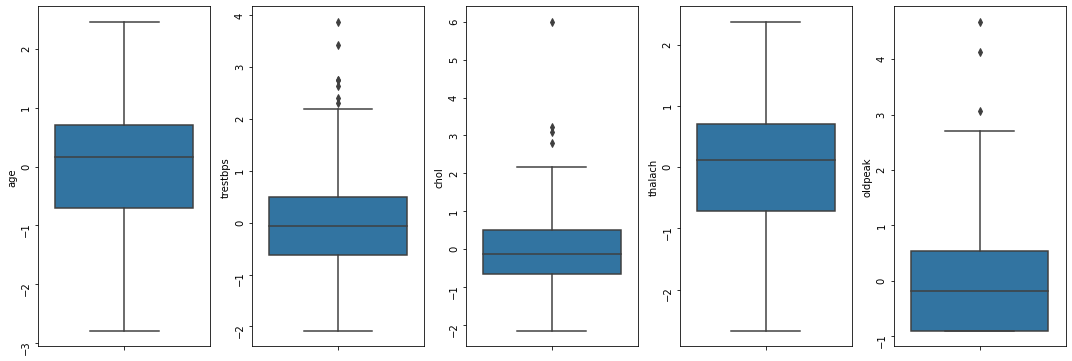

<Figure size 1080x720 with 0 Axes>

In [62]:
plotOutliers(x_train)

##### Plotting outliers for testing data

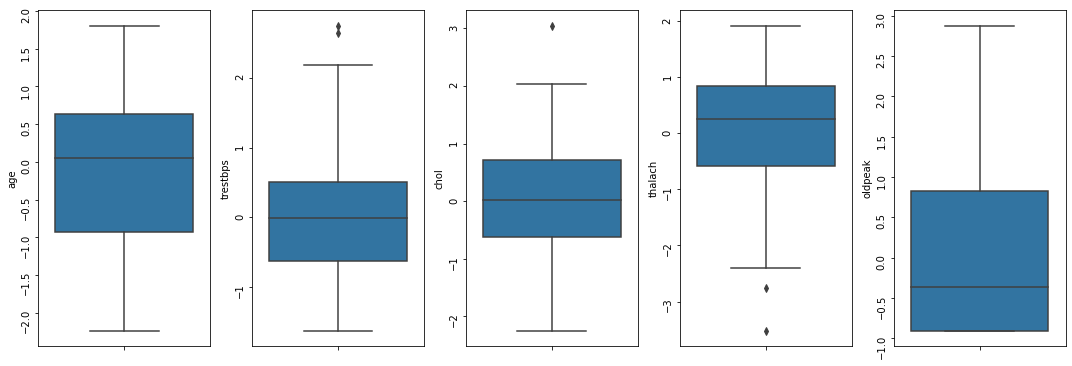

<Figure size 1080x720 with 0 Axes>

In [63]:
plotOutliers(x_test)

### Building model considering all features

In [64]:
models = pd.DataFrame(columns=["Model",'Training_Accuracy_Score',"Testing_Accuracy_Score"], index = [1,2,3,4,5,6])

#### Logistic Regression Model

In [65]:
lr = LogisticRegression(solver='lbfgs',max_iter=100)
train_as_lr, test_as_lr = buildModel(lr, x_train,x_test,y_train,y_test)
print('Training Accuracy Score:',round(train_as_lr*100),'%')
print('Testing Accuracy Score:',round(test_as_lr*100),'%')
models.loc[1] = ['Logistic_Regression_All_Features',round(train_as_lr,3),round(test_as_lr,3)]

CONFUSION MATRIX
[[31  4]
 [ 4 37]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        35
           1       0.90      0.90      0.90        41

    accuracy                           0.89        76
   macro avg       0.89      0.89      0.89        76
weighted avg       0.89      0.89      0.89        76

Training Accuracy Score: 86 %
Testing Accuracy Score: 89 %


##### Observation:
   1. Training and Testing accuracy turns out to be 86% and 89% respectively.
   2. From confusion matrix, we can observe that 8(False Positive - 4 records, False Negative - 4 records) records that are being misclassified.
   3. The classification report of the model shows that 89% of absence of heart disease was predicted correct and 90% of presence of heart disease was predicted correct.

#### Random Forest Classifier

In [66]:
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 2)
train_as_rfc, test_as_rfc = buildModel(rfc, x_train,x_test,y_train,y_test)
print('Training Accuracy Score:',round(train_as_rfc*100),'%')
print('Testing Accuracy Score:',round(test_as_rfc*100),'%')
models.loc[2] = ['Random_Forest_All_Features',round(train_as_rfc,3),round(test_as_rfc,3)]

CONFUSION MATRIX
[[29  6]
 [ 3 38]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       0.86      0.93      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76

Training Accuracy Score: 85 %
Testing Accuracy Score: 88 %


##### Observation:
   1. Training and Testing accuracy turns out to be 84% and 86% respectively.
   2. From confusion matrix, we can observe that 11(False Positive - 5 records, False Negative - 6 records) records that are being misclassified.
   3. The classification report of the model shows that 83% of absence of heart disease was predicted correct and 88% of presence of heart disease was predicted correct.

### Feature Selection using correlation analysis

<AxesSubplot:>

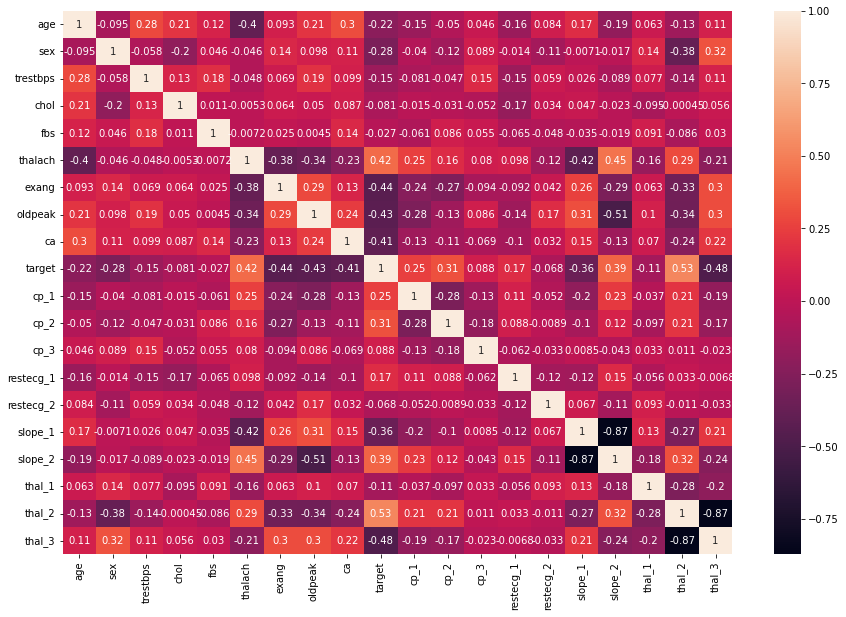

In [67]:
plt.figure(figsize=(15,10))
sns.heatmap(df_duplicate.corr(), annot = True)

In [68]:
from scipy.stats import pearsonr

significant_columns_corr = []
for column in x_train.columns:
    if((column != 'target')):
        corr,p = pearsonr(y_train, x_train[column])
        if(((corr >= 0.3) | (corr <= -0.3)) & (p < 0.05)):
            print(column , corr, p)
            significant_columns_corr.append(column)

thalach 0.40162141923075145 3.6057371703140947e-10
exang -0.40696451455222027 1.9967598358093036e-10
oldpeak -0.4105357695137002 1.3372718843663315e-10
ca -0.40753109117277553 1.8743093442814166e-10
cp_2 0.34398807815935795 1.1243070837485322e-07
slope_1 -0.3315850597601779 3.356235209702715e-07
slope_2 0.36949963744698255 1.0162549150681076e-08
thal_2 0.509065230230135 2.6557584021526035e-16
thal_3 -0.4717938442437395 6.29442509416684e-14


##### Observation:
   The above Features were selected from correlation analysis/heatmap.

In [69]:
#Calculating Variance Inflation Factor for detect multicollinearity for the features selected

calculateVIF(x_train[significant_columns_corr])

,Features,VIF
7,thal_2,7.27
6,slope_2,7.09
5,slope_1,5.92
8,thal_3,5.25
1,exang,1.77
3,ca,1.68
4,cp_2,1.55
2,oldpeak,1.53
0,thalach,1.49


##### Observation:
   VIF below 10 is considered as the feature does not have multicollinearity issue. As we can observe that all the above features have VIF less than 10. So, we can conclude that there is multicollinearity issue.

### Model Building using features selected from Correlation analysis

In [70]:
x_train_corr = x_train[significant_columns_corr]
x_test_corr = x_test[significant_columns_corr]

#### 1. Logistic Regression Model

In [71]:
lr = LogisticRegression(solver='lbfgs',max_iter=100)
train_as_lr_corr, test_as_lr_corr = buildModel(lr, x_train_corr,x_test_corr,y_train,y_test)
print('Training Accuracy Score:',round(train_as_lr_corr*100),'%')
print('Testing Accuracy Score:',round(test_as_lr_corr*100),'%')
models.loc[3] = ['Logistic_Regression_Correlation',round(train_as_lr_corr,3),round(test_as_lr_corr,3)]

CONFUSION MATRIX
[[31  4]
 [ 5 36]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.90      0.88      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76

Training Accuracy Score: 83 %
Testing Accuracy Score: 88 %


##### Observation:
   1. Training and Testing accuracy turns out to be 83% and 88% respectively. We could observe that slight overfitting is happening due to the huge difference in both scores.
   2. From confusion matrix, we can observe that 9(False Positive - 4 records, False Negative - 5 records) records that are being misclassified.
   3. The classification report of the model shows that 90% of absence of heart disease was predicted correct and 86% of presence of heart disease was predicted correct.

ACCURACY OF ROC CURVE: 88 %



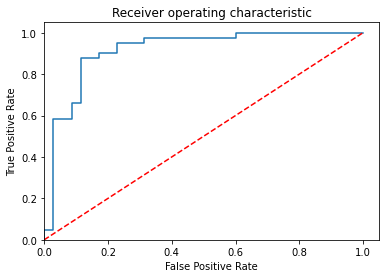

In [72]:
plot_roc_auc(lr, x_test_corr)

##### Observation:
   1. ROC Curves summarizes the trade-off between the true positive rate and the false positive rate for the predictive model using different probability thresholds.
   2. The accuracy of the ROC curve came out to be 88%.

#### 2. Random Forest Classifier

In [73]:
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 2)
train_as_rfc_corr, test_as_rfc_corr = buildModel(rfc, x_train_corr,x_test_corr,y_train,y_test)
print('Training Accuracy Score:',round(train_as_rfc_corr*100),'%')
print('Testing Accuracy Score:',round(test_as_rfc_corr*100),'%')
models.loc[4] = ['Random_Forest_Correlation',round(train_as_rfc_corr,3),round(test_as_rfc_corr,3)]

CONFUSION MATRIX
[[30  5]
 [ 5 36]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        35
           1       0.88      0.88      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76

Training Accuracy Score: 83 %
Testing Accuracy Score: 87 %


##### Observation:
   1. Training and Testing accuracy turns out to be 84% and 86% respectively.
   2. From confusion matrix, we can observe that 11(False Positive - 6 records, False Negative - 5 records) records that are being misclassified.
   3. The classification report of the model shows that 85% of absence of heart disease was predicted correct and 86% of presence of heart disease was predicted correct.

ACCURACY OF ROC CURVE: 87 %



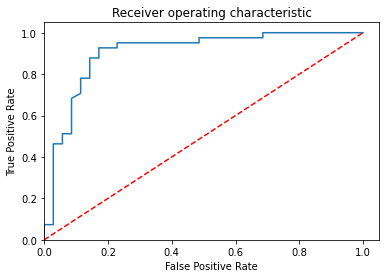

In [74]:
plot_roc_auc(rfc, x_test_corr)

##### Observation:
   1. ROC Curves summarizes the trade-off between the true positive rate and the false positive rate for the predictive model using different probability thresholds.
   2. The accuracy of the ROC curve came out to be 85%.

### Feature Selection using Logit Statsmodel based on p-values and std.error

In [75]:
#Considering all columns to calculate the multicollinearity level in the dataset.

x_train_1 = x_train
calculateVIF(x_train_1)

,Features,VIF
17,thal_2,14.66
18,thal_3,11.92
15,slope_2,11.58
14,slope_1,10.18
1,sex,4.14
16,thal_1,2.52
12,restecg_1,2.28
10,cp_2,2.18
6,exang,2.04
7,oldpeak,1.95


##### Observation:
   We can observe that 4('thal_2, thal_3, slope_2, slope_1') features are having high VIF value (>10). 

In [76]:
#Dropping 'thal_2' feature based on high VIF 

columns = ['thal_2']
x_train_2 = x_train_1.drop(columns, axis=1)
calculateVIF(x_train_2)

,Features,VIF
15,slope_2,4.29
1,sex,4.00
14,slope_1,3.57
17,thal_3,2.52
12,restecg_1,2.16
10,cp_2,2.04
6,exang,1.92
8,ca,1.91
7,oldpeak,1.70
5,thalach,1.69


##### Observation:
   We can observe that all the remaining features are having VIF value (<10). So we have resolved the multicollinearity issue.

In [77]:
#Evaluating Logit Statsmodel for selecting features for the new training dataset.

result_2 = statsModel(y_train,x_train_2)
result_2.summary()

Optimization terminated successfully.
         Current function value: 0.338913
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  226
Model:                          Logit   Df Residuals:                      208
Method:                           MLE   Df Model:                           17
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.5083
Time:                        17:34:47   Log-Likelihood:                -76.594
converged:                       True   LL-Null:                       -155.77
Covariance Type:            nonrobust   LLR p-value:                 5.639e-25
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.1569      0.243      0.646      0.518      -0.319       0.633
sex           -1.2045      0.578     -2.084      0.037      -2.337      -0.072
trestbps      -0.4576      0.221     -2.071      0.038      -0.891      -0.025
chol          -0.1176      0.237     -0.496      0.620      -0.582       0.347
fbs            0.5489      0.714      0.769      0.442      -0.851       1.949
thalach        0.4311      0.288      1.499      0.134      -0.132       0.995
exang         -0.8488      0.492     -1.724      0.085      -1.814       0.116
oldpeak       -0.4460      0.314     -1.422      0.155      -1.061       0.169
ca            -0.9534      0.257     -3.708      0.000      -1.457      -0.450
cp_1           0.7357      0.618      1.191      0.234      -0.475       1.946
cp_2           2.1064      0.535      3.936      0.000       1.058       3.155
cp_3           1.6567      0.731      2.267      0.023       0.224       3.089
restecg_1      0.8404      0.420      2.002      0.045       0.018       1.663
restecg_2      0.1921      2.550      0.075      0.940      -4.806       5.191
slope_1        0.4815      0.545      0.883      0.377      -0.587       1.550
slope_2        1.6274      0.640      2.542      0.011       0.373       2.882
thal_1         0.1008      0.992      0.102      0.919      -1.843       2.045
thal_3        -1.4211      0.480     -2.963      0.003      -2.361      -0.481
==============================================================================
"""

In [78]:
#Dropping features having high p-values

columns = ['restecg_2','thal_1','age','fbs','chol','slope_1','thalach','trestbps','cp_1', ]
x_train_3 = x_train_2.drop(columns, axis=1)
result_3 = statsModel(y_train,x_train_3)
result_3.summary()

Optimization terminated successfully.
         Current function value: 0.360493
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  226
Model:                          Logit   Df Residuals:                      217
Method:                           MLE   Df Model:                            8
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.4770
Time:                        17:34:47   Log-Likelihood:                -81.471
converged:                       True   LL-Null:                       -155.77
Covariance Type:            nonrobust   LLR p-value:                 3.864e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -0.5877      0.434     -1.353      0.176      -1.439       0.263
exang         -1.0040      0.428     -2.344      0.019      -1.843      -0.165
oldpeak       -0.7046      0.287     -2.458      0.014      -1.266      -0.143
ca            -0.8918      0.242     -3.678      0.000      -1.367      -0.417
cp_2           2.1538      0.483      4.462      0.000       1.208       3.100
cp_3           1.6102      0.655      2.458      0.014       0.326       2.894
restecg_1      1.1047      0.375      2.949      0.003       0.370       1.839
slope_2        1.3229      0.444      2.982      0.003       0.453       2.192
thal_3        -1.5376      0.443     -3.474      0.001      -2.405      -0.670
==============================================================================
"""

In [79]:
#Dropping 'sex' feature based on high p-value

columns = ['sex']
x_train_4 = x_train_3.drop(columns, axis=1)
result_4 = statsModel(y_train,x_train_4)
result_4.summary()

Optimization terminated successfully.
         Current function value: 0.364626
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  226
Model:                          Logit   Df Residuals:                      218
Method:                           MLE   Df Model:                            7
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.4710
Time:                        17:34:47   Log-Likelihood:                -82.405
converged:                       True   LL-Null:                       -155.77
Covariance Type:            nonrobust   LLR p-value:                 1.982e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
exang         -1.1113      0.415     -2.680      0.007      -1.924      -0.299
oldpeak       -0.7247      0.288     -2.514      0.012      -1.290      -0.160
ca            -0.9337      0.238     -3.927      0.000      -1.400      -0.468
cp_2           2.0208      0.463      4.366      0.000       1.114       2.928
cp_3           1.2839      0.598      2.146      0.032       0.111       2.456
restecg_1      1.0266      0.368      2.787      0.005       0.305       1.749
slope_2        1.1119      0.408      2.725      0.006       0.312       1.912
thal_3        -1.8053      0.400     -4.508      0.000      -2.590      -1.020
==============================================================================
"""

##### Observation:
   8 features are selected using Logit statsmodel.

### Model Building using features selected from Statsmodel

#### 1. Logistic Regression

In [80]:
#Copying the selected features to the test dataset
x_test_4 = x_test[x_train_4.columns]

In [81]:
lr = LogisticRegression(solver='liblinear',max_iter=1000)

train_as_lr_stats, test_as_lr_stats = buildModel(lr, x_train_4,x_test_4,y_train,y_test)
print('Training Accuracy Score:',round(train_as_lr*100),'%')
print('Testing Accuracy Score:',round(test_as_lr*100),'%')

models.loc[5] = ['Logistic_Regression_Statsmodel',round(train_as_lr_stats,3),round(test_as_lr_stats,3)]

CONFUSION MATRIX
[[29  6]
 [ 7 34]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        35
           1       0.85      0.83      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76

Training Accuracy Score: 86 %
Testing Accuracy Score: 89 %


##### Observation:
   1. Training and Testing accuracy turns out to be 86% and 89% respectively.
   2. From confusion matrix, we can observe that 13(False Positive - 6 records, False Negative - 7 records) records that are being misclassified.
   3. The classification report of the model shows that 81% of absence of heart disease was predicted correct and 85% of presence of heart disease was predicted correct.

ACCURACY OF ROC CURVE: 83 %



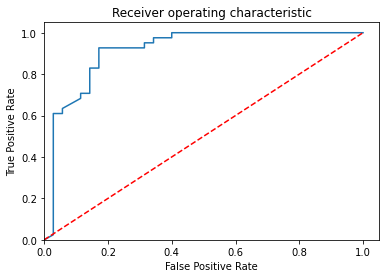

In [82]:
plot_roc_auc(lr,x_test_4)

##### Observation:
   1. ROC Curves summarizes the trade-off between the true positive rate and the false positive rate for the predictive model using different probability thresholds.
   2. The accuracy of the ROC curve came out to be 83%.

#### 2. Random Forest Classifier

In [83]:
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 2)

train_as_rfc_stats, test_as_rfc_stats = buildModel(rfc, x_train_4,x_test_4,y_train,y_test)
print('Training Accuracy Score:',round(train_as_rfc*100),'%')
print('Testing Accuracy Score:',round(test_as_rfc*100),'%')

models.loc[6] = ['Random_Forest_Statsmodel',round(train_as_rfc_stats,3), round(test_as_rfc_stats,3)]

CONFUSION MATRIX
[[28  7]
 [ 5 36]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.84      0.88      0.86        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76

Training Accuracy Score: 85 %
Testing Accuracy Score: 88 %


##### Observation:
   1. Training and Testing accuracy turns out to be 84% and 86% respectively.
   2. From confusion matrix, we can observe that 12(False Positive - 7 records, False Negative - 5 records) records that are being misclassified.
   3. The classification report of the model shows that 85% of absence of heart disease was predicted correct and 84% of presence of heart disease was predicted correct.

ACCURACY OF ROC CURVE: 84 %



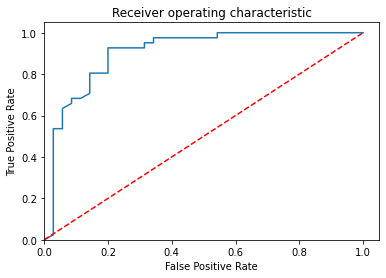

In [84]:
plot_roc_auc(rfc, x_test_4)

##### Observation:
   1. ROC Curves summarizes the trade-off between the true positive rate and the false positive rate for the predictive model using different probability thresholds.
   2. The accuracy of the ROC curve came out to be 84%.

### Model Selection

In [85]:
models

,Model,Training_Accuracy_Score,Testing_Accuracy_Score
1,Logistic_Regression_All_Features,0.858,0.895
2,Random_Forest_All_Features,0.845,0.882
3,Logistic_Regression_Correlation,0.832,0.882
4,Random_Forest_Correlation,0.832,0.868
5,Logistic_Regression_Statsmodel,0.823,0.829
6,Random_Forest_Statsmodel,0.854,0.842


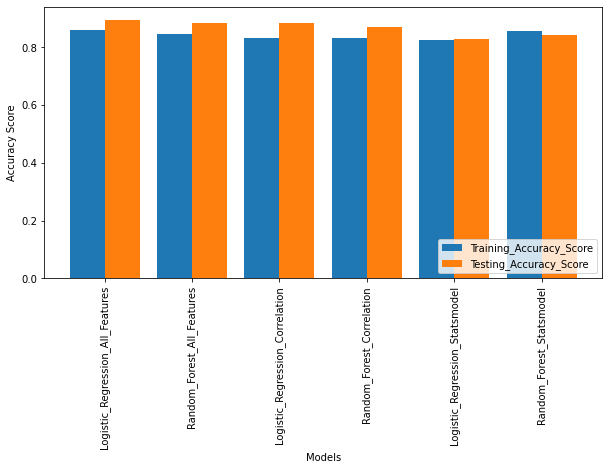

In [86]:
plt.figure(figsize=(10,5))
X_axis = np.arange(len(models['Model']))
plt.bar(X_axis - 0.2, models['Training_Accuracy_Score'], 0.4, label = 'Training_Accuracy_Score')
plt.bar(X_axis + 0.2, models['Testing_Accuracy_Score'], 0.4, label = 'Testing_Accuracy_Score')


plt.xticks(X_axis, models['Model'],rotation=90)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.legend(loc = 'lower right')
plt.show()

##### Observation:
   1. Based on the above plot we can infer that both logistic regression and Random forest is performing good with features selected from statsmodel without any overfitting/underfitting issue when compared to others.
   2. We can proceed and use our "Logistic_Regression_Statsmodel" and "Random_Forest_Statsmodel" as final models for our prediction purpose.

### Feature Selection using Recursive Feature Elimination Method

In [87]:
#Recursive Feature Elimination method

from sklearn.feature_selection import RFE
def select_features(model):
    rfe = RFE(model, n_features_to_select=10) #have mentioned to select 10 features
    rfe.fit(x,y)
    print("Best features:", x.columns[rfe.support_])
    rfe_columns = x.columns[rfe.support_]
    return rfe_columns

In [88]:
def split(rfe_columns):
    x_rfe = x[rfe_columns]
    x_train_rfe,x_test_rfe,y_train,y_test = train_test_split(x_rfe,y,test_size=0.25,random_state=42)
    print()
    return x_train_rfe,x_test_rfe,y_train,y_test

#### 1. Logistic Regression

In [89]:
rfe_columns = select_features(lr)

x_train_rfe,x_test_rfe,y_train,y_test = split(rfe_columns)

train_as_lr, test_as_lr = buildModel(lr, x_train_rfe,x_test_rfe,y_train,y_test)

print('Training Accuracy Score:',round(train_as_lr*100),'%')
print('Testing Accuracy Score:',round(test_as_lr*100),'%')

Best features: Index(['sex', 'exang', 'ca', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'slope_2',
       'thal_2', 'thal_3'],
      dtype='object')

CONFUSION MATRIX
[[30  5]
 [ 6 35]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.88      0.85      0.86        41

    accuracy                           0.86        76
   macro avg       0.85      0.86      0.85        76
weighted avg       0.86      0.86      0.86        76

Training Accuracy Score: 85 %
Testing Accuracy Score: 86 %


##### Observation:
   1. Training and Testing accuracy turns out to be 85% and 86% respectively.
   2. From confusion matrix, we can observe that 11(False Positive - 5 records, False Negative - 6 records) records that are being misclassified.
   3. The classification report of the model shows that 83% of absence of heart disease was predicted correct and 88% of presence of heart disease was predicted correct.

#### 2. Random Forest Classifier

In [90]:
rfe_columns = select_features(rfc)

x_train_rfe,x_test_rfe,y_train,y_test = split(rfe_columns)

train_as_rfc, test_as_rfc = buildModel(rfc, x_train_rfe,x_test_rfe,y_train,y_test)

print('Training Accuracy Score:',round(train_as_rfc*100),'%')
print('Testing Accuracy Score:',round(test_as_rfc*100),'%')

Best features: Index(['age', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_2', 'slope_1',
       'slope_2', 'thal_2', 'thal_3'],
      dtype='object')

CONFUSION MATRIX
[[30  5]
 [ 3 38]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.88      0.93      0.90        41

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76

Training Accuracy Score: 85 %
Testing Accuracy Score: 89 %


##### Observation:
   1. Training and Testing accuracy turns out to be 83% and 88% respectively.
   2. From confusion matrix, we can observe that 9(False Positive - 5 records, False Negative - 4 records) records that are being misclassified.
   3. The classification report of the model shows that 88% of absence of heart disease was predicted correct and 88% of presence of heart disease was predicted correct.

### Feature Selection using Recursive Feature Elimination with Cross Validation Method

#### 1. Logistic Regression

In [91]:
#Recursive Feature Elimination method with Cross Validation

from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator= lr, step = 1, cv = 10, scoring="accuracy")
rfecv = rfecv.fit(x, y)
y_pred = rfecv.predict(x)

rfecv_columns = x.columns[rfecv.support_]
x_rfecv = x[rfecv_columns]

print("The optimal number of features:", rfecv.n_features_)
print("Best features:", rfecv_columns)


x_train_rfecv,x_test_rfecv,y_train,y_test = split(rfecv_columns)

train_as_lrcv, test_as_lrcv = buildModel(lr, x_train_rfecv,x_test_rfecv,y_train,y_test)

print('Training Accuracy Score:',round(train_as_lrcv*100),'%')
print('Testing Accuracy Score:',round(test_as_lrcv*100),'%')

The optimal number of features: 17
Best features: Index(['sex', 'trestbps', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_1',
       'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2',
       'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

CONFUSION MATRIX
[[31  4]
 [ 4 37]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        35
           1       0.90      0.90      0.90        41

    accuracy                           0.89        76
   macro avg       0.89      0.89      0.89        76
weighted avg       0.89      0.89      0.89        76

Training Accuracy Score: 85 %
Testing Accuracy Score: 89 %


##### Observation:
   1. The optimal no.of features selected are 17.
   1. Training and Testing accuracy turns out to be 85% and 89% respectively.This indicates underfitting.
   2. From confusion matrix, we can observe that 8(False Positive - 4 records, False Negative - 4 records) records that are being misclassified.
   3. The classification report of the model shows that 89% of absence of heart disease was predicted correct and 90% of presence of heart disease was predicted correct.

#### 2. Random Forest Classifier

In [92]:
rfecv = RFECV(estimator= rfc, step = 1, cv = 10, scoring="accuracy")
rfecv = rfecv.fit(x, y)
y_pred = rfecv.predict(x)

rfecv_columns = x.columns[rfecv.support_]
x_rfecv = x[rfecv_columns]

print("The optimal number of features:", rfecv.n_features_)
print("Best features:", rfecv_columns)

x_train_rfecv,x_test_rfecv,y_train,y_test = split(rfecv_columns)

train_as_lrcv, test_as_lrcv = buildModel(lr, x_train_rfecv,x_test_rfecv,y_train,y_test)

print('Training Accuracy Score:',round(train_as_lrcv*100),'%')
print('Testing Accuracy Score:',round(test_as_lrcv*100),'%')

The optimal number of features: 19
Best features: Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1',
       'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

CONFUSION MATRIX
[[31  4]
 [ 4 37]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        35
           1       0.90      0.90      0.90        41

    accuracy                           0.89        76
   macro avg       0.89      0.89      0.89        76
weighted avg       0.89      0.89      0.89        76

Training Accuracy Score: 86 %
Testing Accuracy Score: 89 %


##### Observation:
   1. The optimal no.of features selected are 15.
   1. Training and Testing accuracy turns out to be 83% and 88% respectively.This indicates underfitting.
   2. From confusion matrix, we can observe that 9(False Positive - 4 records, False Negative - 5 records) records that are being misclassified.
   3. The classification report of the model shows that 86% of absence of heart disease was predicted correct and 90% of presence of heart disease was predicted correct.

###### Commented code